## RQ3

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# --- Step 1: Load Data ---
df = pd.read_csv("C:\\Users\\Ashish Siwach\\OneDrive - University of Exeter\\Dissertation_Cld\\Datasets\\enhanced_imputed_dataset.csv", parse_dates=['date'], index_col='date')
TARGET = 'BEV_Registrations'

# --- Step 2: Create a Reusable ITS Analysis Function ---
def run_its_analysis(data, target_variable, intervention_date_str):
    """
    Performs and interprets an Interrupted Time Series analysis for a given intervention date.
    """
    print(f"\n--- Running ITS Analysis for Intervention Date: {intervention_date_str} ---")
    
    intervention_date = pd.to_datetime(intervention_date_str)
    df_its = data[[target_variable]].copy()

    # Create ITS Variables
    df_its['time'] = np.arange(len(df_its))
    df_its['intervention'] = (df_its.index >= intervention_date).astype(int)
    
    try:
        intervention_time_index = df_its.loc[intervention_date, 'time']
    except KeyError:
        intervention_time_index = df_its.index.get_loc(intervention_date, method='nearest')
        
    df_its['time_after_intervention'] = df_its['time'] - intervention_time_index
    df_its['time_after_intervention'] = df_its['time_after_intervention'].clip(lower=0)
    
    # Run Regression
    formula = f"{target_variable} ~ time + intervention + time_after_intervention"
    its_model = smf.ols(formula, data=df_its).fit()
    
    print("\n--- Interpretation of Key Results ---")
    intervention_coef = its_model.params.get('intervention', 0)
    slope_change_coef = its_model.params.get('time_after_intervention', 0)
    intervention_pvalue = its_model.pvalues.get('intervention', 1)
    slope_change_pvalue = its_model.pvalues.get('time_after_intervention', 1)
    
    print(f"Immediate Impact (Step Change): Coefficient = {intervention_coef:,.0f} (p-value: {intervention_pvalue:.3f})")
    print(f"Change in Trend (Slope Change): Coefficient = {slope_change_coef:,.0f} (p-value: {slope_change_pvalue:.3f})")
    print("-" * 50)


# --- Step 3: Define Your Specific Intervention Dates and Run Analysis ---
intervention_dates = [
    '2011-01-31',
    '2016-03-31',
    '2018-11-30',
    '2020-03-31',
    '2021-03-31',
    '2021-12-31',
    '2022-06-30'
]

for date in intervention_dates:
    run_its_analysis(data=df, target_variable=TARGET, intervention_date_str=date)


--- Running ITS Analysis for Intervention Date: 2011-01-31 ---

--- Interpretation of Key Results ---
Immediate Impact (Step Change): Coefficient = -5,973 (p-value: 0.000)
Change in Trend (Slope Change): Coefficient = 148 (p-value: 0.000)
--------------------------------------------------

--- Running ITS Analysis for Intervention Date: 2016-03-31 ---

--- Interpretation of Key Results ---
Immediate Impact (Step Change): Coefficient = -10,576 (p-value: 0.000)
Change in Trend (Slope Change): Coefficient = 549 (p-value: 0.000)
--------------------------------------------------

--- Running ITS Analysis for Intervention Date: 2018-11-30 ---

--- Interpretation of Key Results ---
Immediate Impact (Step Change): Coefficient = -313 (p-value: 0.886)
Change in Trend (Slope Change): Coefficient = 735 (p-value: 0.000)
--------------------------------------------------

--- Running ITS Analysis for Intervention Date: 2020-03-31 ---

--- Interpretation of Key Results ---
Immediate Impact (Step Ch

C:\Users\Ashish Siwach\AppData\Local\Temp\ipykernel_22184\3403834329.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("C:\\Users\\Ashish Siwach\\OneDrive - University of Exeter\\Dissertation_Cld\\Datasets\\enhanced_imputed_dataset.csv", parse_dates=['date'], index_col='date')


Final, cleaned visualization saved as 'final_policy_impact_visualization.png'


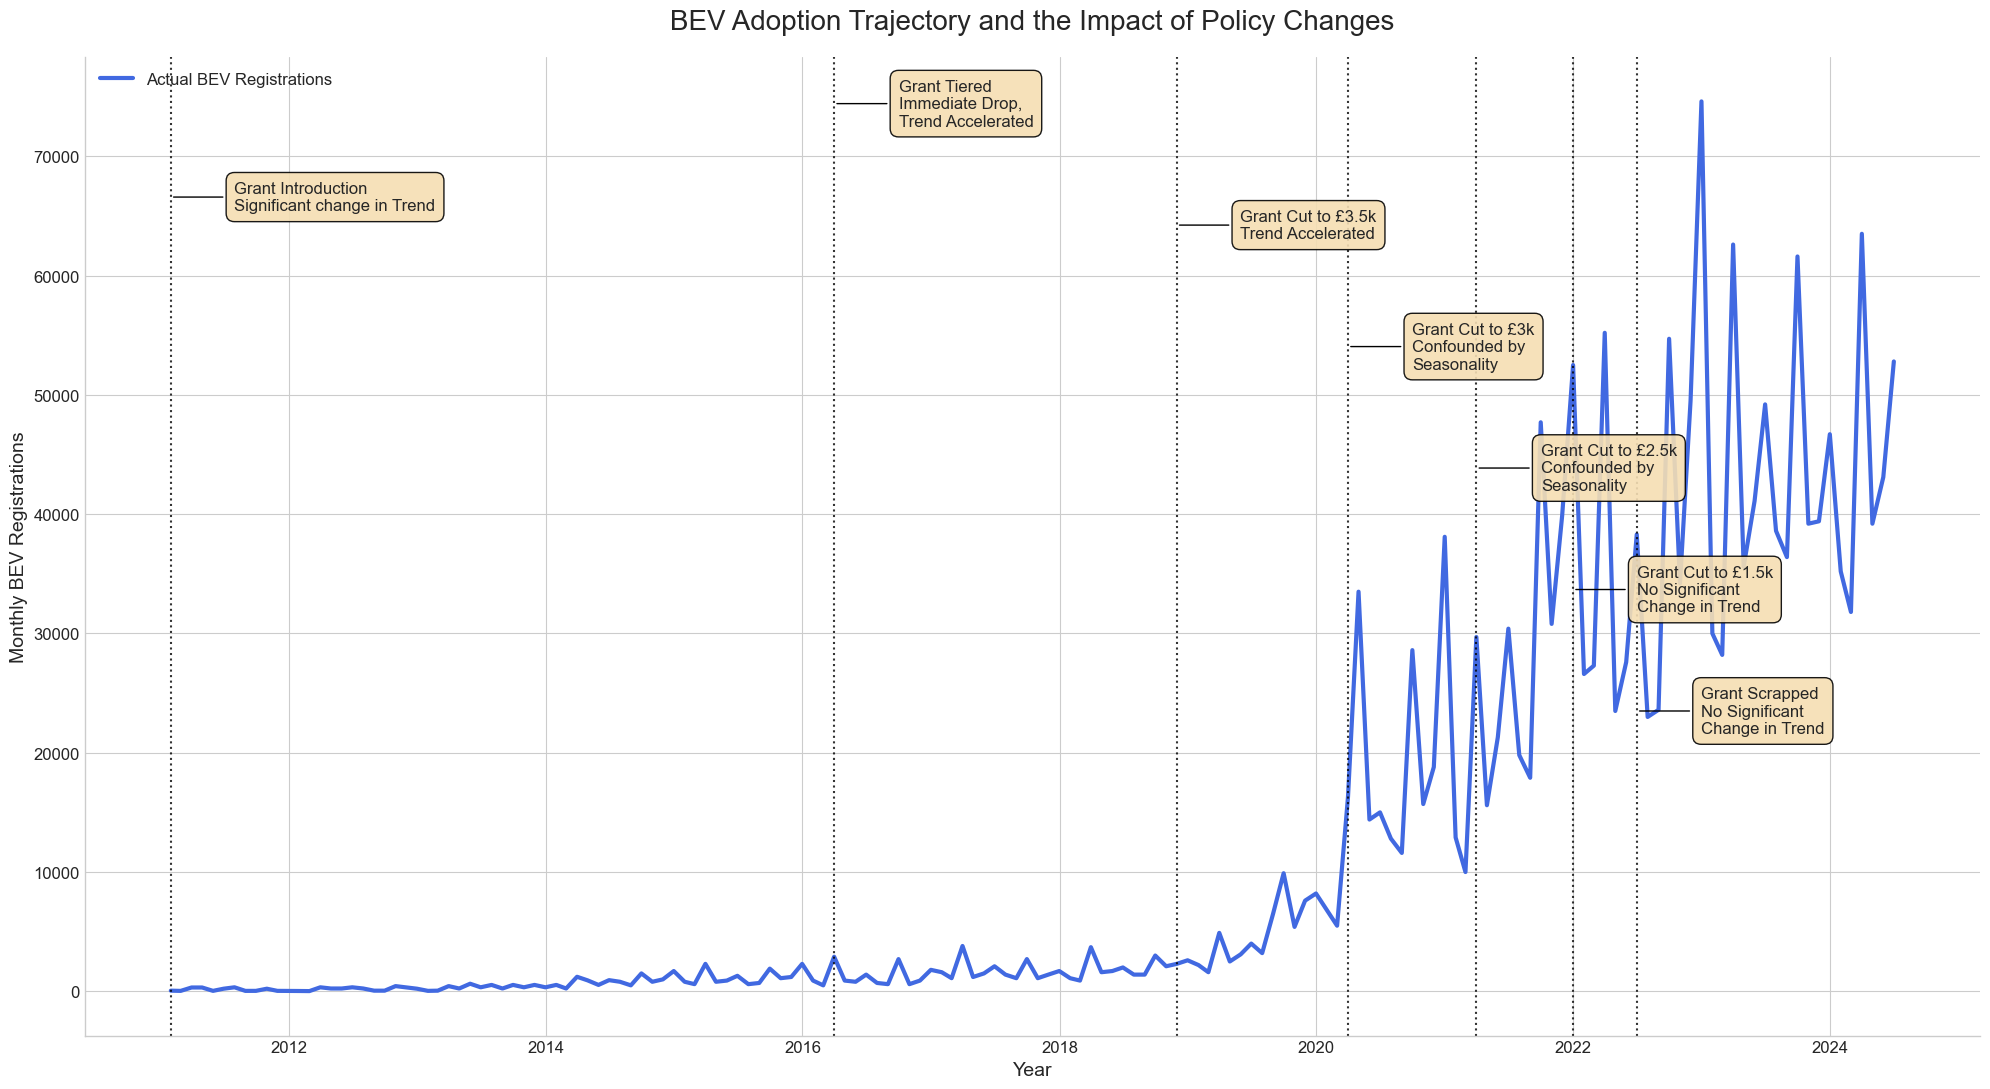

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load Data ---
df = pd.read_csv("C:\\Users\\Ashish Siwach\\OneDrive - University of Exeter\\Dissertation_Cld\\Datasets\\enhanced_imputed_dataset.csv", parse_dates=['date'], index_col='date')
TARGET = 'BEV_Registrations'

# --- THE FIX: The complete and correct dictionary of all interventions ---
interventions = {
    '2011-01-31': {'label': 'Grant Introduction', 'finding': 'Significant change in Trend'},
    '2016-03-31': {'label': 'Grant Tiered', 'finding': 'Immediate Drop,\nTrend Accelerated'},
    '2018-11-30': {'label': 'Grant Cut to £3.5k', 'finding': 'Trend Accelerated'},
    '2020-03-31': {'label': 'Grant Cut to £3k', 'finding': 'Confounded by\nSeasonality'},
    '2021-03-31': {'label': 'Grant Cut to £2.5k', 'finding': 'Confounded by\nSeasonality'},
    '2021-12-31': {'label': 'Grant Cut to £1.5k', 'finding': 'No Significant\nChange in Trend'},
    '2022-06-30': {'label': 'Grant Scrapped', 'finding': 'No Significant\nChange in Trend'}
}

# --- Step 3: Create the Visualization ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(20, 11))

# Plot the historical BEV registrations data
ax.plot(df.index, df[TARGET], label='Actual BEV Registrations', color='royalblue', linewidth=3)

# --- Step 4: Add Vertical Lines and Staggered Annotations ---
# Define staggered vertical positions for the annotations to prevent overlap
y_positions_relative = [0.85, 0.95, 0.82, 0.69, 0.56, 0.43, 0.30]

for i, (date_str, info) in enumerate(interventions.items()):
    intervention_date = pd.to_datetime(date_str)
    
    # Add the vertical line marking the policy change
    ax.axvline(x=intervention_date, color='black', linestyle=':', linewidth=1.5, alpha=0.8)
    
    # Use the staggered vertical position
    y_pos = ax.get_ylim()[1] * y_positions_relative[i]
    
    # Add the text and a simple line pointing to the event
    ax.annotate(f"{info['label']}\n{info['finding']}",
                xy=(intervention_date, y_pos),
                xytext=(intervention_date + pd.DateOffset(months=6), y_pos),
                fontsize=12,
                arrowprops=dict(arrowstyle="-", color='black', connectionstyle="arc3,rad=0"),
                bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.9),
                ha='left', va='center')

# --- Step 5: Final Touches ---
ax.set_title('BEV Adoption Trajectory and the Impact of Policy Changes', fontsize=20, pad=20)
ax.set_ylabel('Monthly BEV Registrations', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.legend(loc='upper left', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
sns.despine()
plt.tight_layout()
plt.savefig('final_policy_impact_visualization.png')

print("Final, cleaned visualization saved as 'final_policy_impact_visualization.png'")

## RQ6



--- Part 2: Answering RQ6 - Infrastructure Threshold Analysis ---
Generating plot to identify infrastructure thresholds...


C:\Users\Ashish Siwach\AppData\Local\Temp\ipykernel_22184\2216625423.py:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("C:\\Users\\Ashish Siwach\\OneDrive - University of Exeter\\Dissertation_Cld\\Datasets\\enhanced_imputed_dataset.csv", parse_dates=['date'], index_col='date')


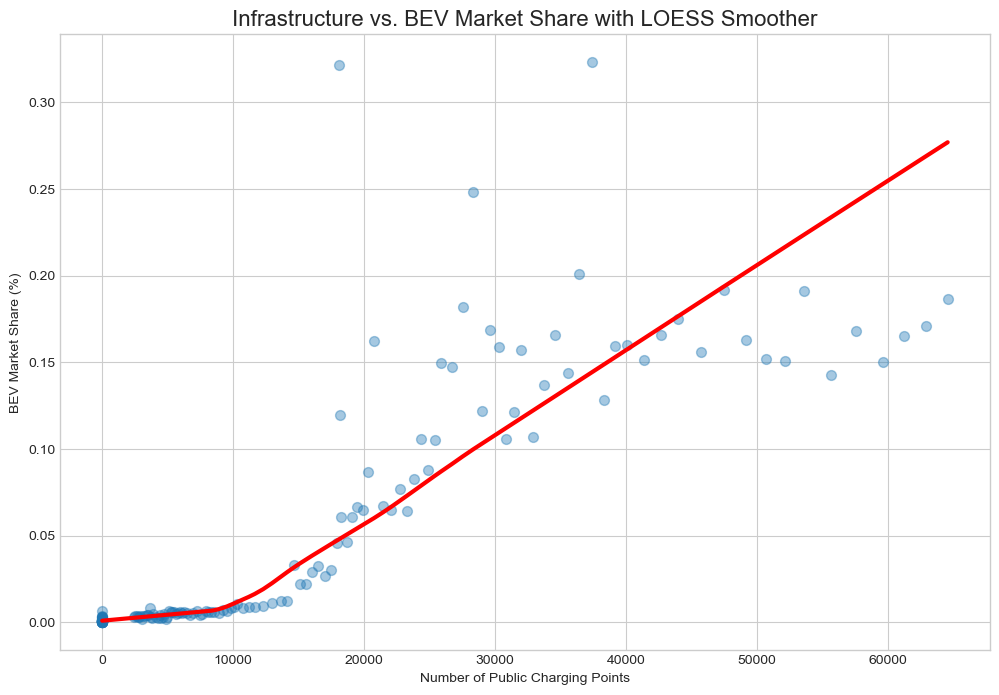

Visualizing the point on the red LOESS curve where the slope visibly steepens.
A point where the curve goes from relatively flat to steep can be interpreted as a 'critical point' or 'threshold',
suggesting that beyond this point, additional infrastructure has an accelerating effect on BEV adoption.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\n\n--- Part 2: Answering RQ6 - Infrastructure Threshold Analysis ---")

# --- Step 1: Load Data ---
df = pd.read_csv("C:\\Users\\Ashish Siwach\\OneDrive - University of Exeter\\Dissertation_Cld\\Datasets\\enhanced_imputed_dataset.csv", parse_dates=['date'], index_col='date')

# --- Step 2 & 3: Visualize with Scatter Plot and LOESS Curve ---
print("Generating plot to identify infrastructure thresholds...")
plt.figure(figsize=(12, 8))

# Use seaborn's regplot with a lowess=True parameter to create the LOESS curve
sns.regplot(x=df['Charging_Infrastructure'], y=df['BEV_Share'],
            scatter_kws={'alpha':0.4, 's':50},
            line_kws={'color': 'red', 'linewidth': 3},
            lowess=True) # This is the key parameter for the LOESS smoother

plt.title('Infrastructure vs. BEV Market Share with LOESS Smoother', fontsize=16)
plt.xlabel('Number of Public Charging Points')
plt.ylabel('BEV Market Share (%)')
plt.grid(True)
plt.show()

print("Visualizing the point on the red LOESS curve where the slope visibly steepens.")
print("A point where the curve goes from relatively flat to steep can be interpreted as a 'critical point' or 'threshold',")
print("suggesting that beyond this point, additional infrastructure has an accelerating effect on BEV adoption.")

### Granger Causality Test for RQ4, RQ5 and RQ6

C:\Users\Ashish Siwach\AppData\Local\Temp\ipykernel_22184\603942053.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("C:\\Users\\Ashish Siwach\\OneDrive - University of Exeter\\Dissertation_Cld\\Datasets\\enhanced_imputed_dataset.csv", parse_dates=['date'], index_col='date')


Early market correlation (2011-2018): r = 0.88, p = 0.0000
Mature market correlation (2019-2024): r = 0.65, p = 0.0000


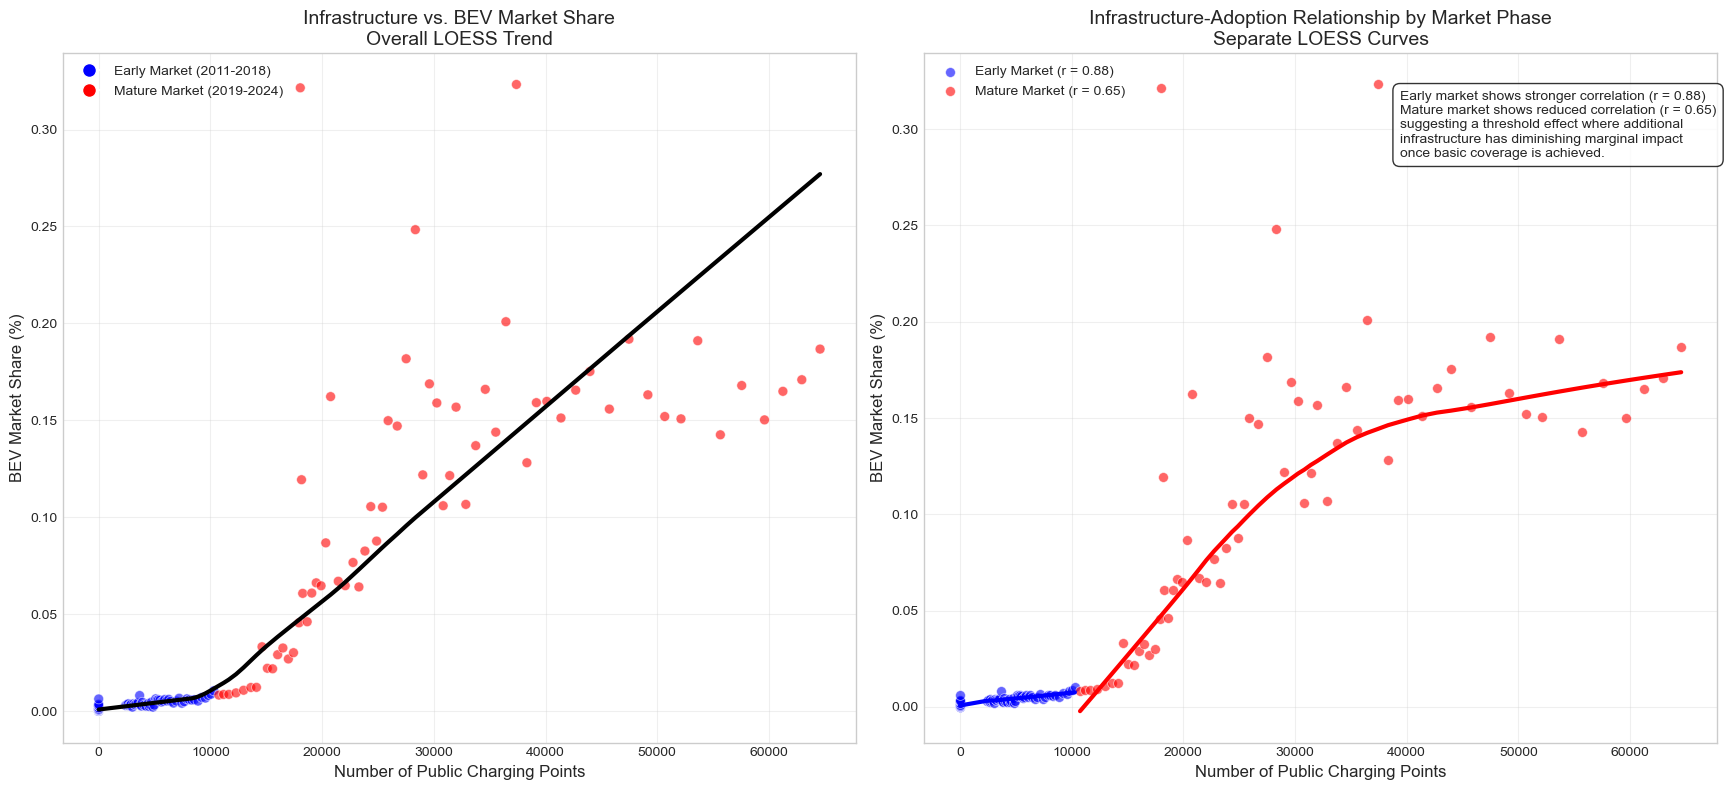

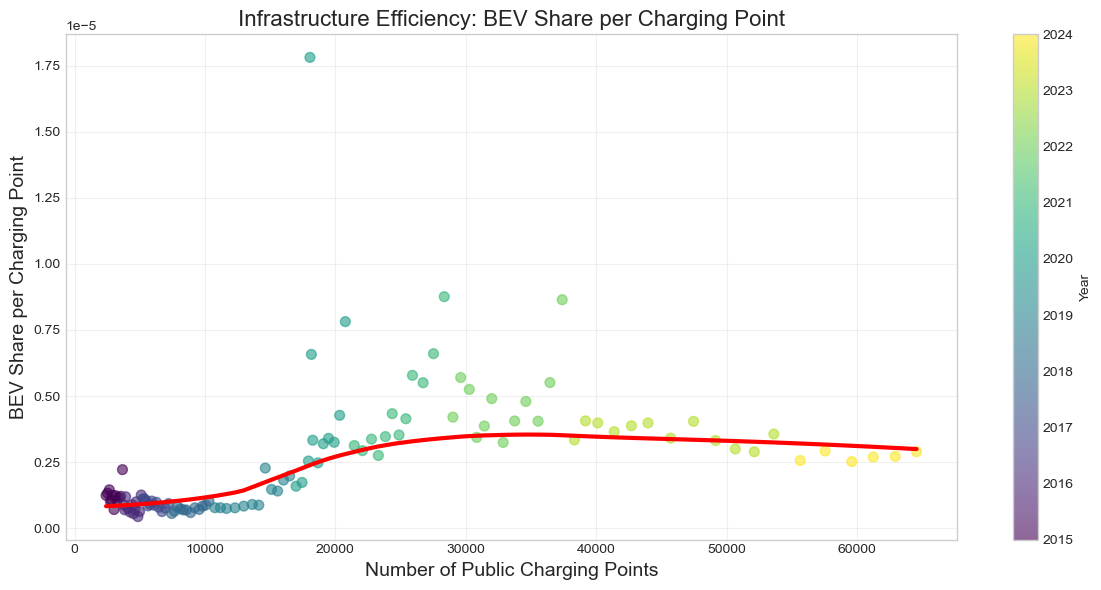

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load your data
df = pd.read_csv("C:\\Users\\Ashish Siwach\\OneDrive - University of Exeter\\Dissertation_Cld\\Datasets\\enhanced_imputed_dataset.csv", parse_dates=['date'], index_col='date')

# Split into early and mature market periods
early_market = df[df.index < '2019-01-01'].copy()
mature_market = df[df.index >= '2019-01-01'].copy()

# Calculate Pearson correlation for each period
early_corr, early_pval = pearsonr(early_market['Charging_Infrastructure'], early_market['BEV_Share'])
mature_corr, mature_pval = pearsonr(mature_market['Charging_Infrastructure'], mature_market['BEV_Share'])

print(f"Early market correlation (2011-2018): r = {early_corr:.2f}, p = {early_pval:.4f}")
print(f"Mature market correlation (2019-2024): r = {mature_corr:.2f}, p = {mature_pval:.4f}")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Combined data with LOESS curve
sns.scatterplot(x='Charging_Infrastructure', y='BEV_Share', 
                data=df, ax=ax1, alpha=0.6, s=50,
                hue=df.index.year >= 2019, 
                palette=['blue', 'red'],
                legend=False)

# Add custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Early Market (2011-2018)',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Mature Market (2019-2024)',
           markerfacecolor='red', markersize=10)
]
ax1.legend(handles=legend_elements, loc='upper left')

# Apply LOESS to combined data
smoothed = lowess(df['BEV_Share'].values, df['Charging_Infrastructure'].values, frac=0.67)
ax1.plot(smoothed[:, 0], smoothed[:, 1], 'k-', linewidth=3, label='LOESS Curve')

# Label the plot
ax1.set_title(f'Infrastructure vs. BEV Market Share\nOverall LOESS Trend', fontsize=14)
ax1.set_xlabel('Number of Public Charging Points', fontsize=12)
ax1.set_ylabel('BEV Market Share (%)', fontsize=12)
ax1.grid(True, alpha=0.3)

# Plot 2: Separate LOESS curves for each period
sns.scatterplot(x='Charging_Infrastructure', y='BEV_Share', 
                data=early_market, ax=ax2, alpha=0.6, s=50, color='blue',
                label=f'Early Market (r = {early_corr:.2f})')

sns.scatterplot(x='Charging_Infrastructure', y='BEV_Share', 
                data=mature_market, ax=ax2, alpha=0.6, s=50, color='red',
                label=f'Mature Market (r = {mature_corr:.2f})')

# Apply LOESS to each period separately
early_smoothed = lowess(early_market['BEV_Share'].values, 
                        early_market['Charging_Infrastructure'].values, frac=0.67)
mature_smoothed = lowess(mature_market['BEV_Share'].values, 
                         mature_market['Charging_Infrastructure'].values, frac=0.67)

ax2.plot(early_smoothed[:, 0], early_smoothed[:, 1], 'b-', linewidth=3)
ax2.plot(mature_smoothed[:, 0], mature_smoothed[:, 1], 'r-', linewidth=3)

# Label the plot
ax2.set_title('Infrastructure-Adoption Relationship by Market Phase\nSeparate LOESS Curves', fontsize=14)
ax2.set_xlabel('Number of Public Charging Points', fontsize=12)
ax2.set_ylabel('BEV Market Share (%)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left')

# Add an annotation about the threshold effect
text = (f"Early market shows stronger correlation (r = {early_corr:.2f})\n"
        f"Mature market shows reduced correlation (r = {mature_corr:.2f})\n"
        "suggesting a threshold effect where additional\n"
        "infrastructure has diminishing marginal impact\n"
        "once basic coverage is achieved.")
ax2.text(0.60, 0.85, text, transform=ax2.transAxes, fontsize=10,
        bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('infrastructure_threshold_analysis.png', dpi=300)
plt.show()

# Bonus: Calculate and plot the efficiency ratio (BEV Share per Charging Point)
df['efficiency_ratio'] = df['BEV_Share'] / df['Charging_Infrastructure']

plt.figure(figsize=(12, 6))
df_sorted = df.sort_values('Charging_Infrastructure')
plt.scatter(df_sorted['Charging_Infrastructure'], df_sorted['efficiency_ratio'], 
            alpha=0.6, s=50, c=df_sorted.index.year, cmap='viridis')

# Apply LOESS to efficiency ratio
smoothed_ratio = lowess(df_sorted['efficiency_ratio'].values, 
                        df_sorted['Charging_Infrastructure'].values, frac=0.67)
plt.plot(smoothed_ratio[:, 0], smoothed_ratio[:, 1], 'r-', linewidth=3)

plt.colorbar(label='Year')
plt.title('Infrastructure Efficiency: BEV Share per Charging Point', fontsize=16)
plt.xlabel('Number of Public Charging Points', fontsize=14)
plt.ylabel('BEV Share per Charging Point', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('infrastructure_efficiency_ratio.png', dpi=300)
plt.show()

In [6]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import warnings
warnings.filterwarnings('ignore')

# --- Step 1: Load Data and Define Variables ---.
df = pd.read_csv("C:\\Users\\Ashish Siwach\\OneDrive - University of Exeter\\Dissertation_Cld\\Datasets\\enhanced_imputed_dataset.csv", index_col=0, parse_dates=True)

# Define the target variable and the drivers to be tested
TARGET = 'BEV_Registrations'
DRIVERS = [
    'RHDI_per_head',           # For RQ4
    'Petrol_Price',            # For RQ4
    'GT_Index',                # For RQ5
    'Charging_Infrastructure'  # For RQ6
]

# Granger causality requires stationary data, so we use the first difference
# This removes the trend, allowing us to test the underlying relationship.
df_diff = df[[TARGET] + DRIVERS].diff().dropna()
print("Data differenced to ensure stationarity.")

# --- Step 2: Run Tests for Each Driver ---
max_lag = 4 # testing for causality up to a 4-month lag
print(f"\nRunning Granger Causality tests up to a {max_lag}-month lag...")

for driver in DRIVERS:
    print(f"\n--- Testing if '{driver}' Granger-causes '{TARGET}' ---")
    
    # The test requires a dataframe with the two series in the correct order:
    # The variable being caused (the effect) comes first.
    test_data = df_diff[[TARGET, driver]]
    
    # Run the test and print the detailed results for each lag
    # The output will show the F-test statistic and the p-value.
    # A p-value < 0.05 suggests we can reject the null hypothesis and
    # conclude that the driver variable Granger-causes BEV registrations.
    grangercausalitytests(test_data, maxlag=max_lag, verbose=True)


Data differenced to ensure stationarity.

Running Granger Causality tests up to a 4-month lag...

--- Testing if 'RHDI_per_head' Granger-causes 'BEV_Registrations' ---

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0051  , p=0.9429  , df_denom=157, df_num=1
ssr based chi2 test:   chi2=0.0052  , p=0.9423  , df=1
likelihood ratio test: chi2=0.0052  , p=0.9423  , df=1
parameter F test:         F=0.0051  , p=0.9429  , df_denom=157, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5851  , p=0.5583  , df_denom=154, df_num=2
ssr based chi2 test:   chi2=1.2082  , p=0.5466  , df=2
likelihood ratio test: chi2=1.2037  , p=0.5478  , df=2
parameter F test:         F=0.5851  , p=0.5583  , df_denom=154, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6044  , p=0.6131  , df_denom=151, df_num=3
ssr based chi2 test:   chi2=1.8973  , p=0.5940  , df=3
likelihood ratio test: chi2=1.8860  , p=0.5964  , df=3